# 確率密度関数 (PDF)

ヒストグラム法で推定する．

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# comment out below
import json
def dict2rc(dict): return {f'{k1}.{k2}': v for k1, d in dict.items() for k2, v in d.items()}
with open('mpl_rc.json') as f:
    plt.rcParams.update(dict2rc(json.load(f)))
plt.style.use('dracula')

In [2]:
path = '../data/kanazawa2017-2019_min.csv'
data = pd.read_csv(path, header=None)
data.columns = ['ymd', 'time', 'temperature']
data.head()


,ymd,time,temperature
0,2017/1/1,1:00,7.5
1,2017/1/1,2:00,7.4
2,2017/1/1,3:00,6.8
3,2017/1/1,4:00,6.3
4,2017/1/1,5:00,5.9


In [3]:
# 統計量をまとめて確認
data.describe()

,temperature
count,26279.000000
mean,15.476053
std,8.988614
min,-3.500000
25%,7.600000
50%,15.700000
75%,22.900000
max,37.300000


## ヒストグラム法

- ヒストグラムを dictionary 型を使って作る
- ヒストグラムの index は最初に初期化する（最小値・最大値を含むように）

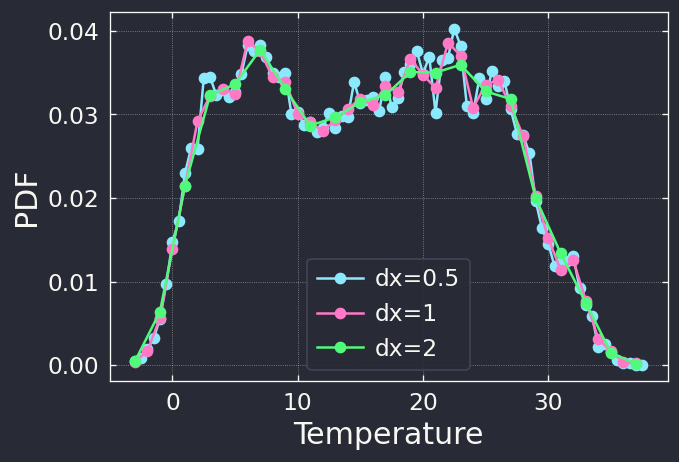

In [9]:
def calc_pdf(xs, dx=1):
    # xs: データの１次元配列
    # dx: bin幅

    xmin = int(min(xs)) - dx/2  # binの中央値を整数にするための調整
    nbin = int((max(xs) - xmin) / dx) + 1  # binの数
    counter = {index: 0 for index in range(nbin)}

    for x in xs:
        index = int((x-xmin) / dx)
        counter[index] += 1

    pdf = dict()
    N = len(xs) * dx # 規格化定数
    for index, count in counter.items():
        xbin = xmin + (index+0.5) * dx
        pdf[xbin] = count / N

    return pdf


def draw_pdf(pdf, label=None, kind='line'):
    x = pdf.keys()
    p = pdf.values()

    if kind == 'line':
        plt.plot(x, p, marker='o', label=label)
    if kind == 'bar':
        plt.bar(x, p, label=label, zorder=2)
    
    plt.xlabel('Temperature')
    plt.ylabel('PDF')
    plt.legend()


for dx in [0.5, 1, 2]:
    pdf = calc_pdf(data['temperature'], dx=dx)
    draw_pdf(pdf, label=f'dx={dx}')

## ヒストグラム法（使い方に注意が必要な実装）

- 辞書を初期化しない
- Count するとき，key が存在するかで処理を分ける
- 辞書の key はソートされていないので，ソート処理が必要

注意点
- 最小値から最大値の間に密度0のbinがある場合，`plt.plot()` すると前後の値の平均値が描画されてしまう
- 特に，データが離れて分布している場合に問題となる
- `plt.bar()` で描けば何の問題もない

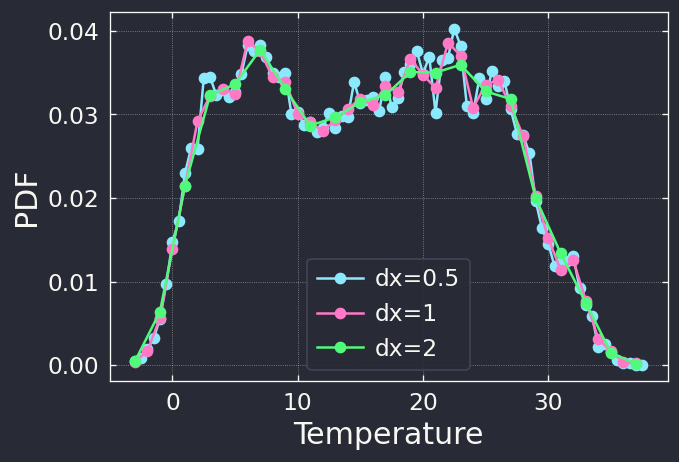

In [6]:
def calc_pdf(xs, dx=1):
    # xs: データの１次元配列
    # dx: bin幅

    xmin = int(min(xs)) - dx/2  # binの中央値を整数にするための調整

    counter = dict()
    for x in xs:
        index = int((x-xmin)/dx)
        if index in counter:
            counter[index] += 1
        else:
            counter[index] = 1

    pdf = dict()
    N = len(xs) * dx # 規格化定数
    for index, count in counter.items():
        xbin = xmin + (index+0.5) * dx
        pdf[xbin] = count / N

    # binでソートする
    pdf = dict(sorted(pdf.items(), key=lambda d: d[0]))

    return pdf


def draw_pdf(pdf, label=None, kind='line'):
    x = pdf.keys()
    p = pdf.values()

    if kind == 'line':
        plt.plot(x, p, marker='o', label=label)
    if kind == 'bar':
        plt.bar(x, p, label=label)
    
    plt.xlabel('Temperature')
    plt.ylabel('PDF')
    plt.legend(bbox_to_anchor=(1,1))


for dx in [0.5, 1, 2]:
    pdf = calc_pdf(data['temperature'], dx=dx)
    draw_pdf(pdf, label=f'dx={dx}', kind='line')

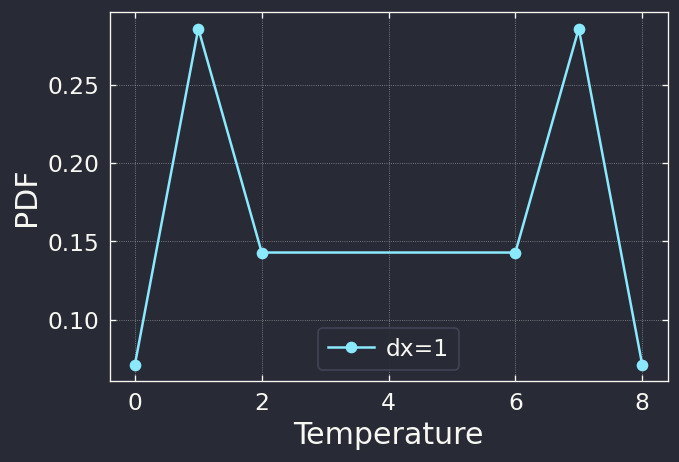

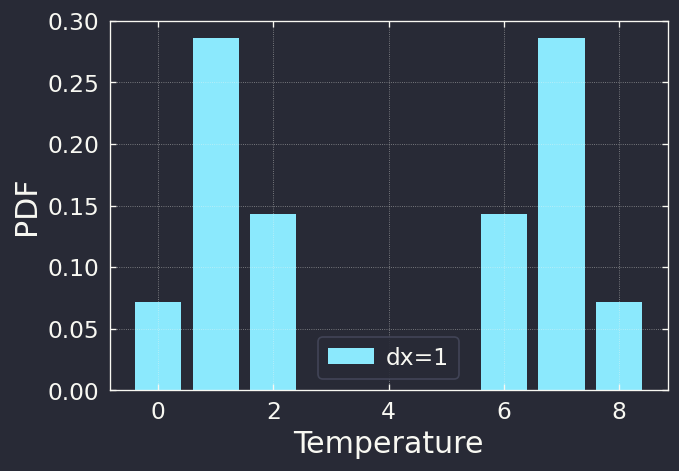

In [7]:
def bimodal_case():
    xs = [0,1,1,1,1,2,2] + [6,6,7,7,7,7,8]
    dx = 1
    pdf = calc_pdf(xs, dx=dx)
    draw_pdf(pdf, label=f'dx={dx}', kind='line')
    plt.figure()
    draw_pdf(pdf, label=f'dx={dx}', kind='bar')

bimodal_case()

legendの位置は調整すべき．`loc=upper center` あるいは `bbox_to_anchor=(1,1)` など．

## 整数変換に関する注意点

観点
- 種類：切り捨て, 偶数丸め, 四捨五入, 切り上げ
- マイナス値の処理

例
| メソッド | 丸め方 |
| :-- | :-- |
|`int` | 0 に近い方へ丸める |
|`round` | 偶数丸め |
|`math.floor` | 小さい方へ丸める|
|`math.ceil`| 大きい方へ丸める |

In [8]:
import math
for x in [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5]:
    print(f'int({x})={int(x)}', end=', ')
    print(f'round({x})={round(x)}', end=', ')
    print(f'math.floor({x})={math.floor(x)}', end=', ')
    print(f'math.ceil({x})={math.ceil(x)}', end='\n')


int(-1.5)=-1, round(-1.5)=-2, math.floor(-1.5)=-2, math.ceil(-1.5)=-1
int(-0.5)=0, round(-0.5)=0, math.floor(-0.5)=-1, math.ceil(-0.5)=0
int(0.5)=0, round(0.5)=0, math.floor(0.5)=0, math.ceil(0.5)=1
int(1.5)=1, round(1.5)=2, math.floor(1.5)=1, math.ceil(1.5)=2
int(2.5)=2, round(2.5)=2, math.floor(2.5)=2, math.ceil(2.5)=3
int(3.5)=3, round(3.5)=4, math.floor(3.5)=3, math.ceil(3.5)=4
